In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Conclave

In [21]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
query_numbers = [1,5,6]

data_query_dict = {}
for query_num in query_numbers:
    data_size_list = []

    for data_size in data_sizes:
        time_taken_col = f"{data_size}"
        cols = ["size", "timestamp", time_taken_col]
        path = f"demo/{data_size}_tpch_{query_num}_out.txt"
        try:
            data = pd.read_csv(path, names=cols, header=None)
            # data.set_axis(cols, axis=1)
            time_col = data.loc[:,time_taken_col]
            print(time_col, type(time_col))
            data_size_list.append(time_col)

        except:
            print(f"Failed to read file {path}")
    data_query_dict[query_num] = data_size_list

# returns a data_query_dict with key = query_number

0    15.496875
1    15.402907
2    15.394446
3    15.615586
4    15.479759
5    15.403954
6    15.338794
7    15.707915
8    15.603457
9    15.455946
Name: 1MB, dtype: float64 <class 'pandas.core.series.Series'>
0    15.930237
1    15.819560
2    15.924305
3    15.842666
4    15.754578
5    15.777412
6    16.318201
7    16.756600
8    15.789029
9    16.006062
Name: 10MB, dtype: float64 <class 'pandas.core.series.Series'>
0    19.777334
1    19.710734
2    20.073572
3    20.030444
4    20.088245
5    20.083858
6    19.974204
7    19.714832
8    19.950076
9    20.076036
Name: 100MB, dtype: float64 <class 'pandas.core.series.Series'>
0    61.619620
1    61.111201
2    60.923478
3    60.989480
4    61.785656
5    62.811023
6    61.181723
7    60.898583
8    61.483872
9    61.691911
Name: 1GB, dtype: float64 <class 'pandas.core.series.Series'>
0    41.797554
1    42.024863
2    43.535259
3    42.304034
4    42.141742
5    41.879385
6    42.042548
7    42.784206
8    42.552179
9    41.790352

# Data Station

In [22]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
query_numbers = [1,2,3]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/conclave_queries/{data_size}_{party_number}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = {}
for qnum in query_numbers:
    data_station_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(data_station_dict[2][i])

# Returns a data_station_dict with key = query number

{1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6774191856384275, 1.5875263214111328, 1.5726404190063477]}), 2: defaultdict(<class 'list'>, {'1MB': [1.5643503665924072, 1.5619549751281738, 1.595458984375]}), 3: defaultdict(<class 'list'>, {'1MB': [1.5407154560089111, 1.5356895923614502, 1.5477800369262695]})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6774191856384275, 1.5875263214111328, 1.5726404190063477]}), 2: defaultdict(<class 'list'>, {'1MB': [1.5643503665924072, 1.5619549751281738, 1.595458984375]}), 3: defaultdict(<class 'list'>, {'1MB': [1.5407154560089111, 1.5356895923614502, 1.5477800369262695]})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6774191856384275, 1.5875263214111328, 1.5726404190063477], '10MB': [1.801450490951538, 1.7279384136199951, 1.7361106872558594]}), 2: defaultdict(<class 'list'>, {'1MB': [1.5643503665924072, 1.5619549751281738, 1.595458984375], '10MB': [

# Plots

In [23]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(15.338794021000012, 15.46785230399999, 15.70791476100004), (15.754578194000032, 15.883485227499989, 16.75660020700002), (19.710734247000005, 20.00232395149999, 20.088245312999906), (60.89858261099994, 61.332797114499954, 62.81102251800007)]
[(1.5726404190063477, 1.5875263214111328, 1.6774191856384275), (1.7279384136199951, 1.7361106872558594, 1.801450490951538), (2.979782819747925, 3.006009578704834, 4.115457773208618), (15.63155746459961, 15.712296962738035, 24.51296448707581)]


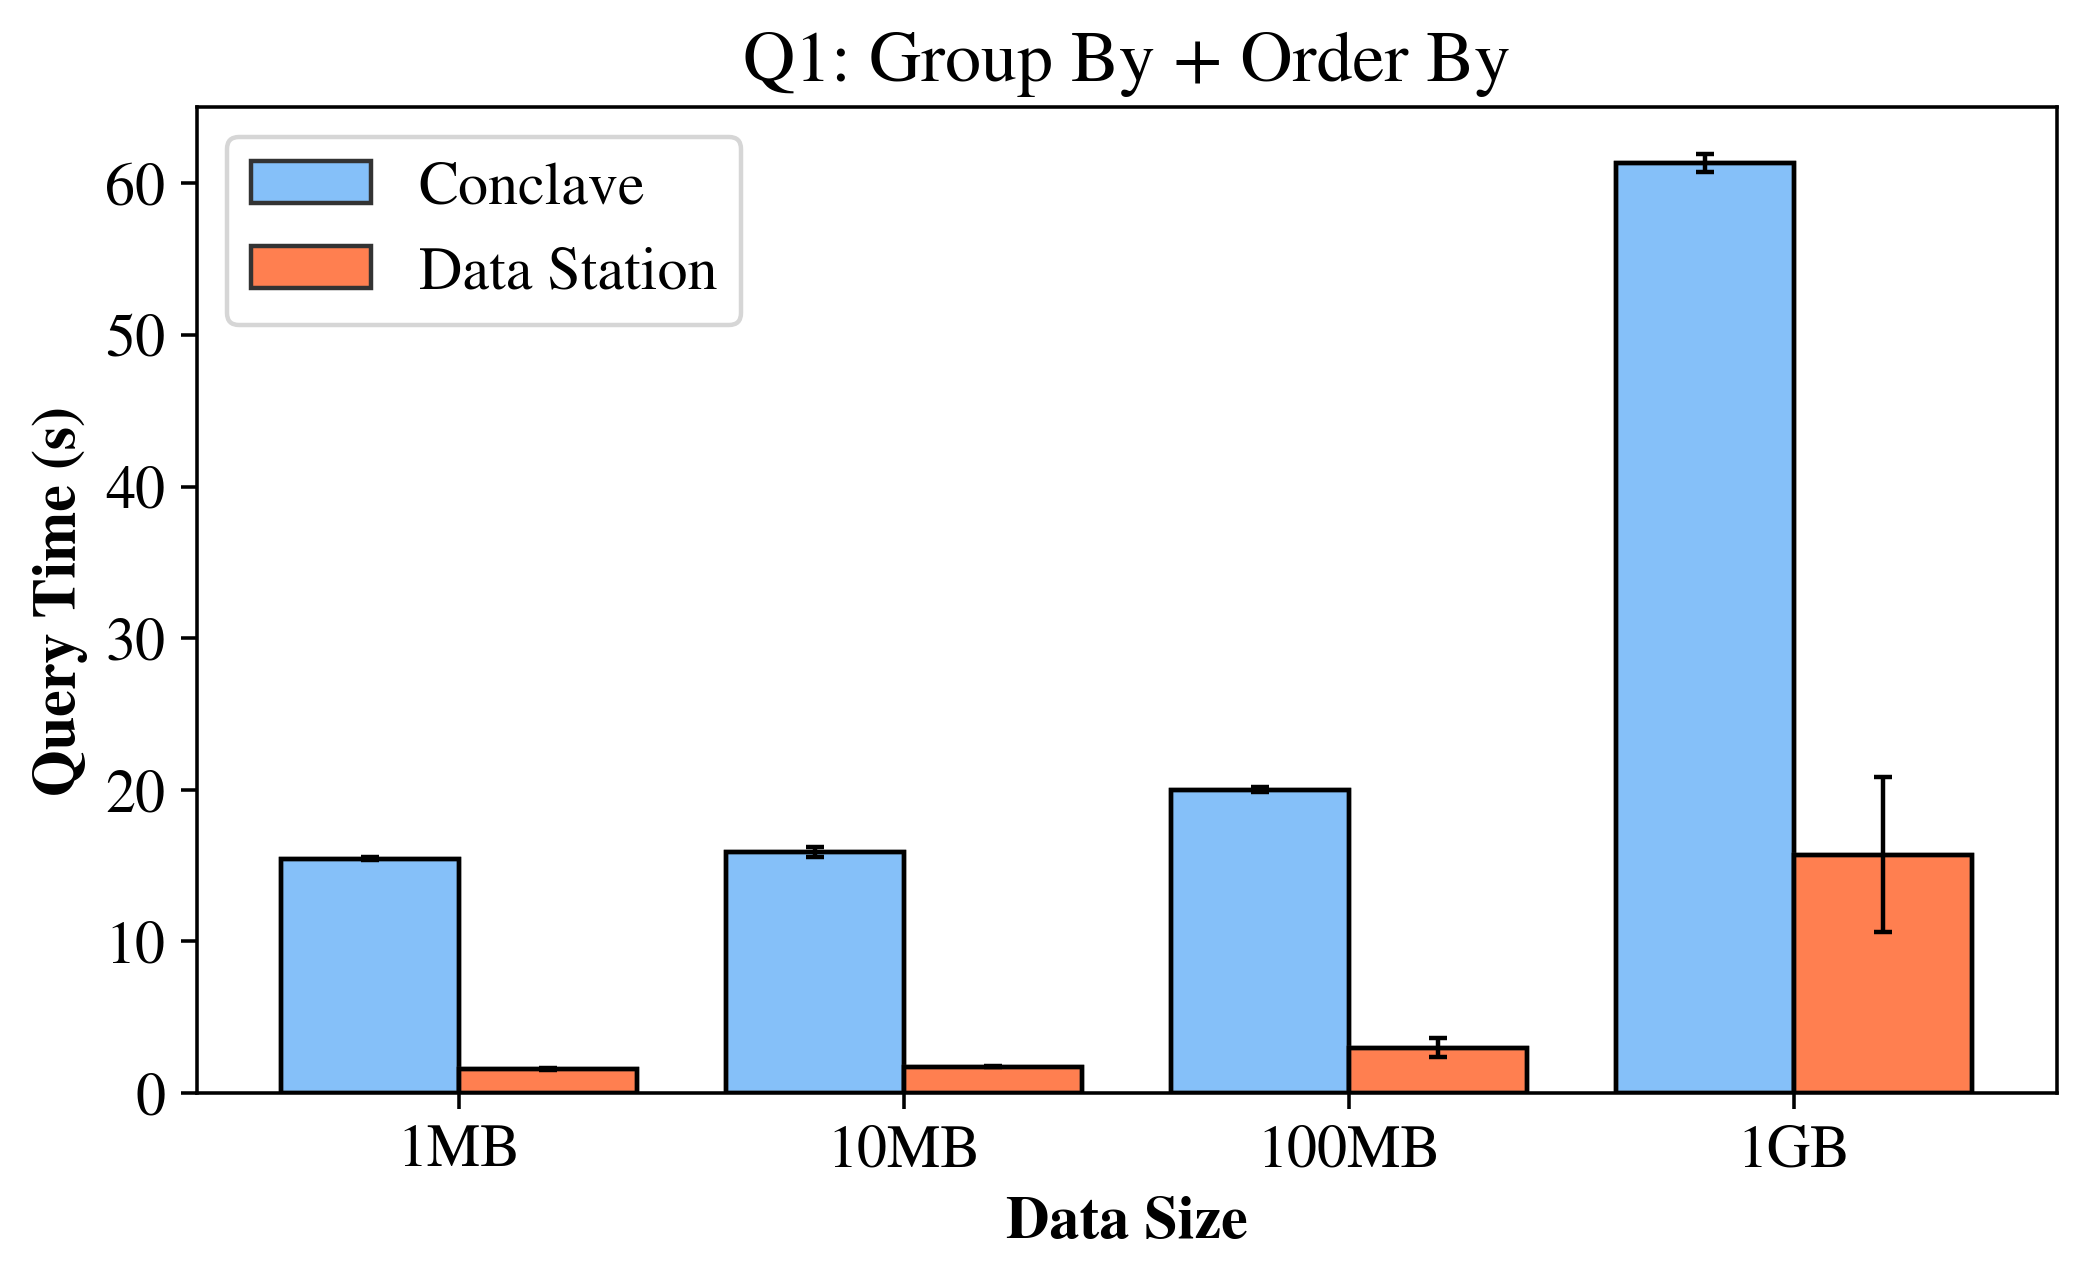

In [24]:
data_left = data_query_dict[1]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[1]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("Q1: Group By + Order By")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q1.pdf", bbox_inches='tight')

plt.show()


[(14.135544849000324, 14.195916445999956, 15.81244132899974), (45.326658399999815, 46.9048368629999, 54.63875775099996)]
[(1.5619549751281738, 1.5643503665924072, 1.595458984375), (1.7538552284240725, 1.7597203254699707, 1.7680294513702393), (2.995494842529297, 3.0281567573547363, 3.033928394317627), (15.79345417022705, 15.81292986869812, 15.88024091720581)]
[14.195916445999956, 46.9048368629999, nan, nan]
[nan, nan, 0, 0]


/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_43351/638163570.py:71: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_43351/638163570.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,


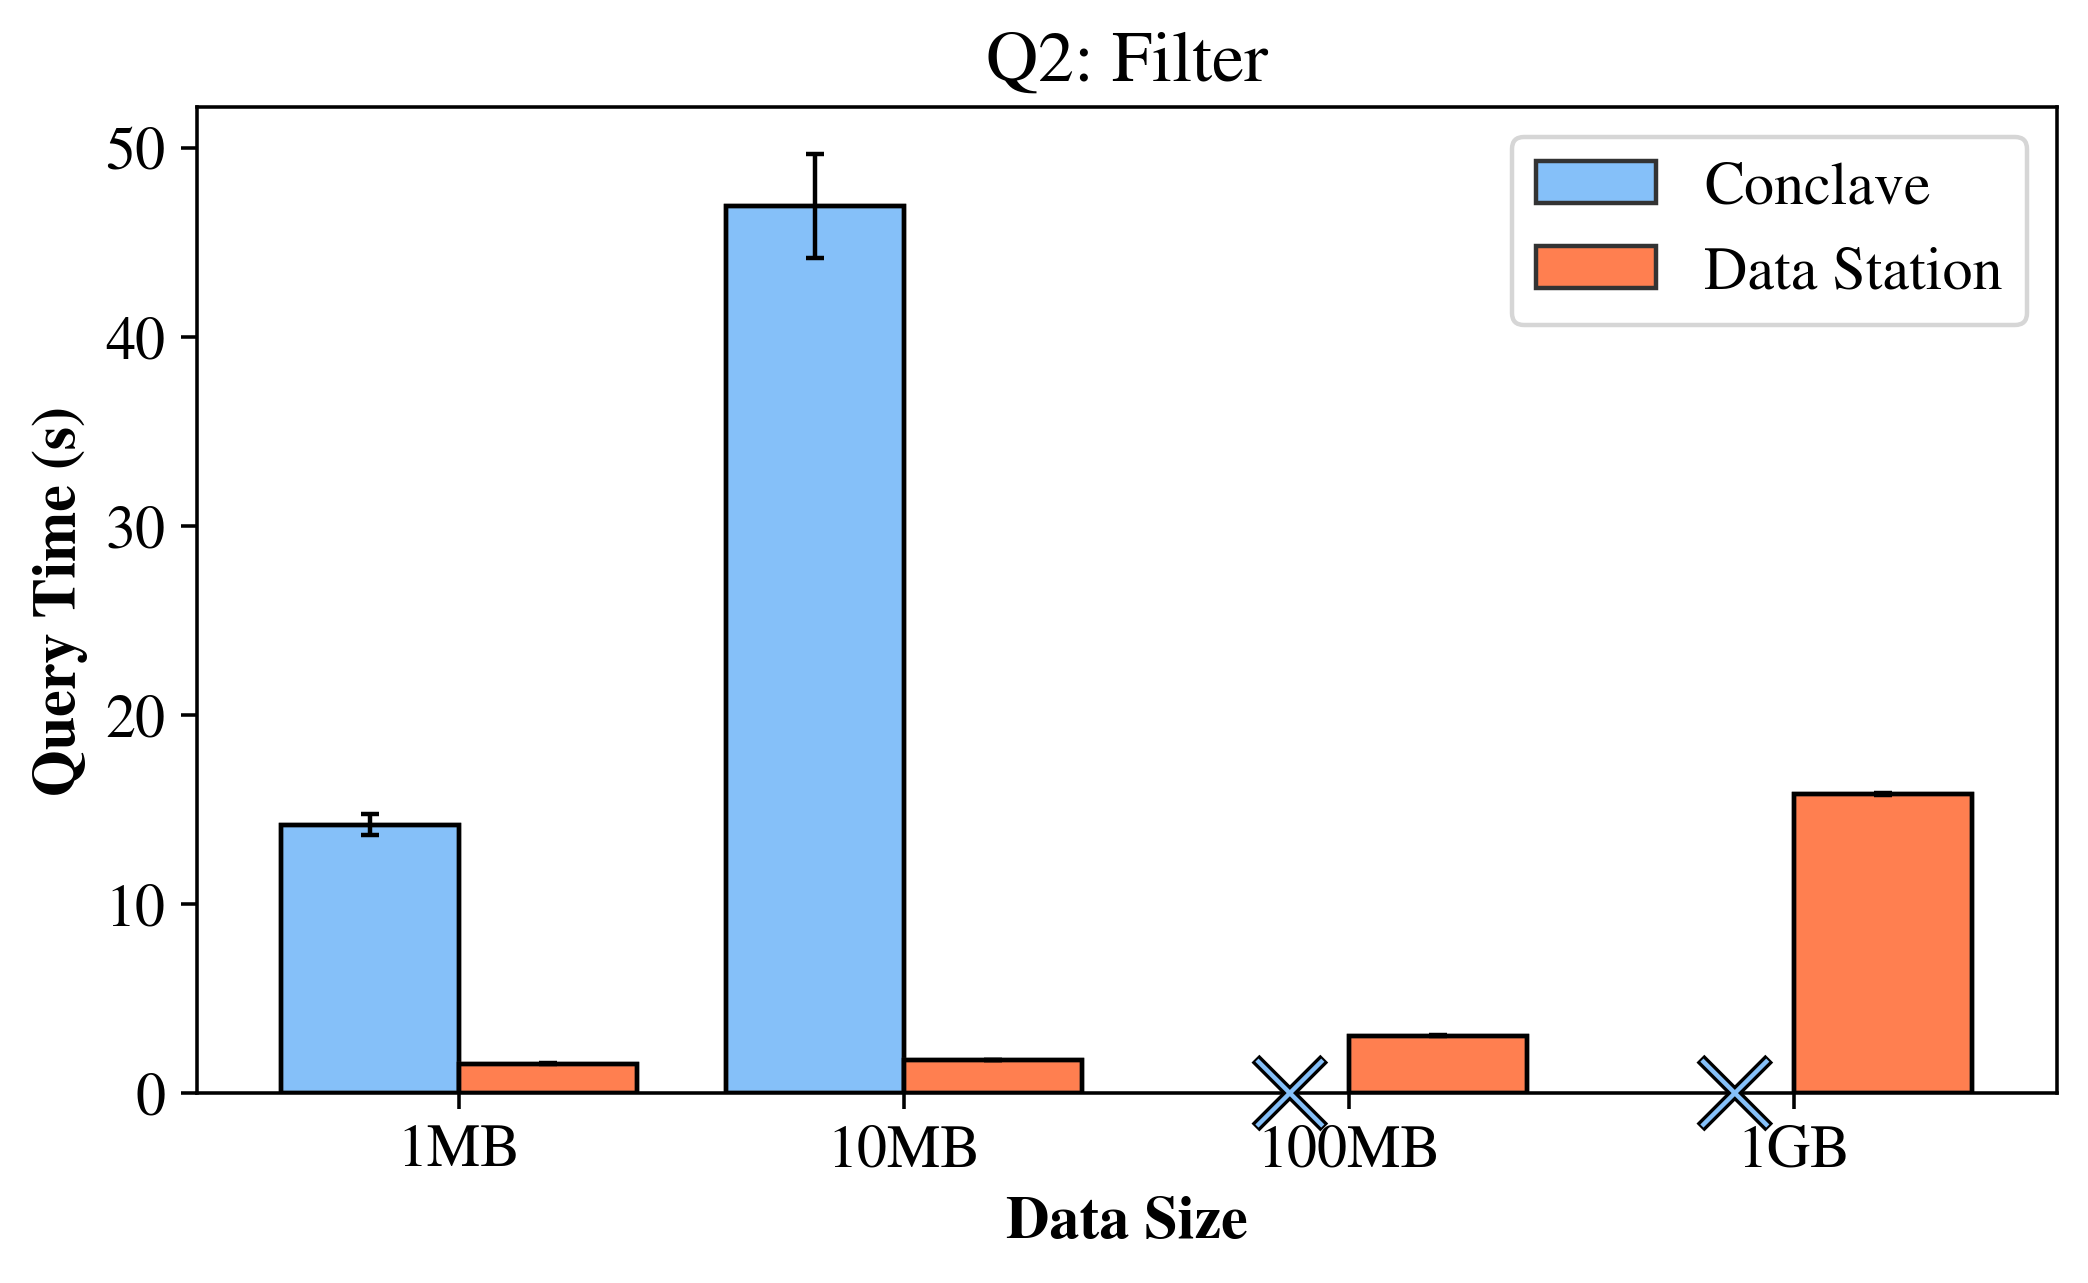

In [25]:
data_left = data_query_dict[6]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[2]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

left_x = [float("nan") if not np.isnan(row) else 0 for row in medians_left]

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

print(left_x)
plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
           edgecolors='black',
           marker='x',
           color = "black",
           zorder=100,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,
            edgecolors='black',
            marker='x',
            color = "#85C0F9",
            zorder=100,
            clip_on=False,
            linewidths=1,
            )


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("Q2: Filter")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q2.pdf", bbox_inches='tight')

plt.show()


[(41.790351662999456, 42.0921451639997, 43.535258868999335)]
[(1.5356895923614502, 1.5407154560089111, 1.5477800369262695), (1.5760509967803955, 1.5815775394439695, 1.599860668182373), (1.8289132118225095, 1.8306572437286377, 1.836219787597656), (4.454388380050659, 4.476754903793335, 4.490670680999756)]
[42.0921451639997, nan, nan, nan]
[nan, 0, 0, 0]


/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_43351/344549396.py:71: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_43351/344549396.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,


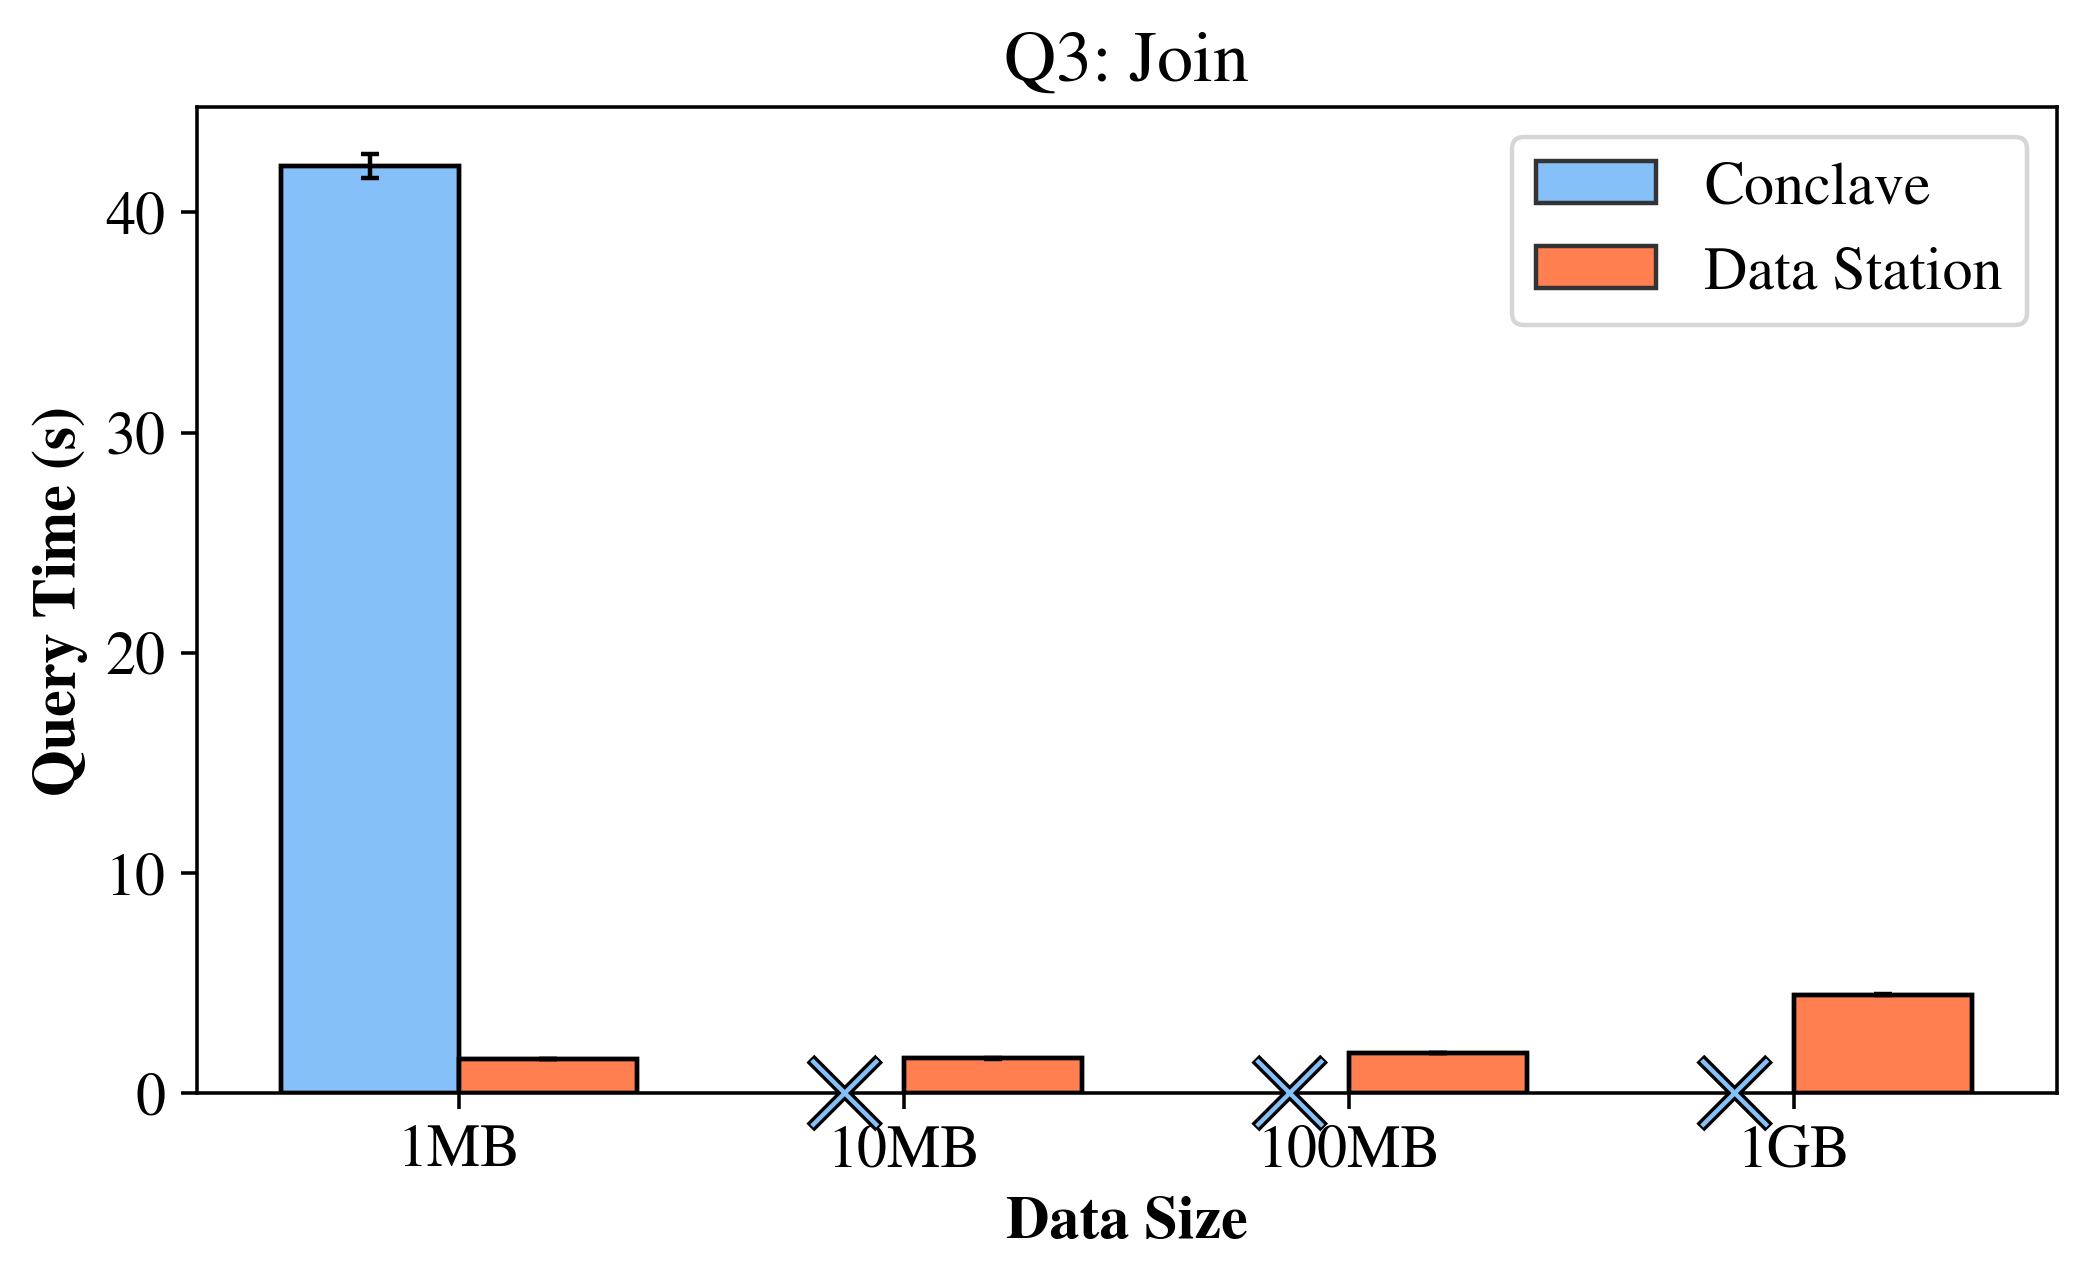

In [26]:
data_left = data_query_dict[5]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[3]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

left_x = [float("nan") if not np.isnan(row) else 0 for row in medians_left]

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

print(left_x)
plt.scatter(np.arange(4)+1-width/3, left_x, [240]*4,
           edgecolors='black',
           marker='x',
           color = "black",
           zorder=100,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(np.arange(4)+1-width/3,left_x, [220]*4,
            edgecolors='black',
            marker='x',
            color = "#85C0F9",
            zorder=100,
            clip_on=False,
            linewidths=1,
            )


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("Q3: Join")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q3.pdf", bbox_inches='tight')

plt.show()
